# 1. UNDERSTAND THE PROBLEM STATEMENT

The sinking of the Titanic is one of the most tragic tragedies in history. The tragedy took place on April 15th, 1912. The Titanic
sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to lack of
lifeboats for all passengers. Some passengers were more likely to survive than others, such as women, children, and upper-
class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following:

- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex: Sex
- Age: Age in years
- Sibsp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
- Target class: Survived: (0 = No, 1 = Yes)

Data Source: https://www.kaggle.com/c/titanic

# 2. IMPORT LIBRARIES AND DATASETS

In [1]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Read the data using pandas dataframe
titanic_df = pd.read_csv('titanic.csv')

In [3]:
# Show the data head!

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. PERFORM DATA VISUALIZATION

In [4]:
# Count the number of survivors and non-survivors
survived_df = titanic_df[titanic_df['Survived'] == 1]
no_survived_df = titanic_df[titanic_df['Survived'] == 0]

In [5]:
# Count the survived and deceased
print("Total =", len(titanic_df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =", 1. * len(survived_df) / len(titanic_df) * 100.0, "%")
 
print("Number of passengers who did not Survive =", len(no_survived_df))
print("Percentage who did not survive =", 1. * len(no_survived_df) / len(titanic_df) * 100.0, "%")
         

Total = 891
Number of passengers who survived = 342
Percentage Survived = 38.38383838383838 %
Number of passengers who did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


<AxesSubplot: xlabel='Pclass', ylabel='count'>

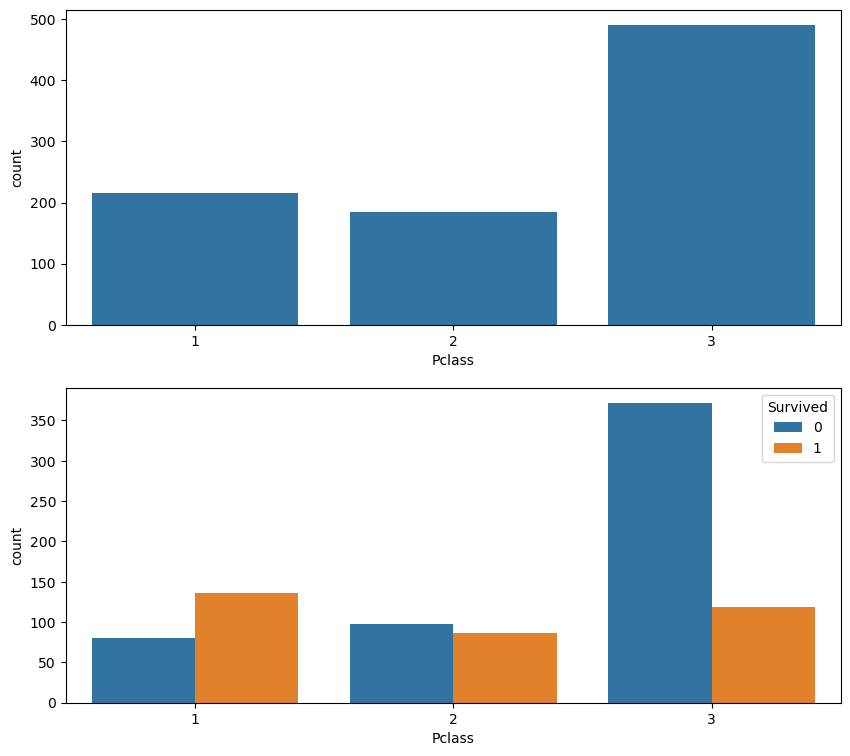

In [6]:
# Bar Chart to indicate the number of people who survived based on their class
plt.figure(figsize=(10, 9))
plt.subplot(211)
sns.countplot(x='Pclass', data=titanic_df)

plt.subplot(212)
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)

If you are a first class, you have a higher chance of survival

<AxesSubplot: xlabel='Parch', ylabel='count'>

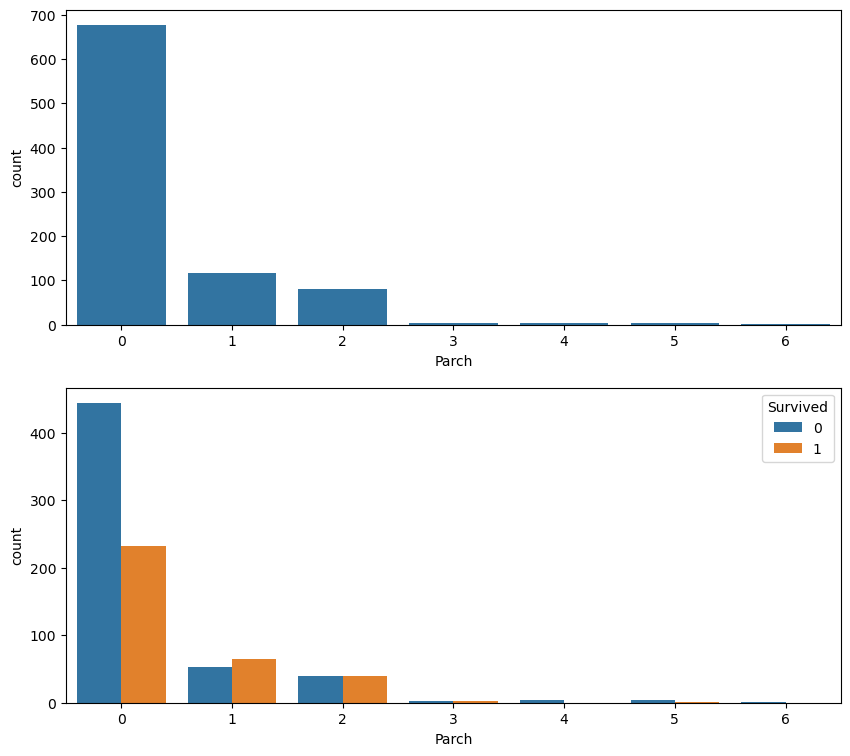

In [7]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
plt.figure(figsize = (10, 9))

plt.subplot(211)
sns.countplot(x='Parch', data=titanic_df)

plt.subplot(212)
sns.countplot(x='Parch', hue='Survived', data=titanic_df)

If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)

<AxesSubplot: xlabel='Sex', ylabel='count'>

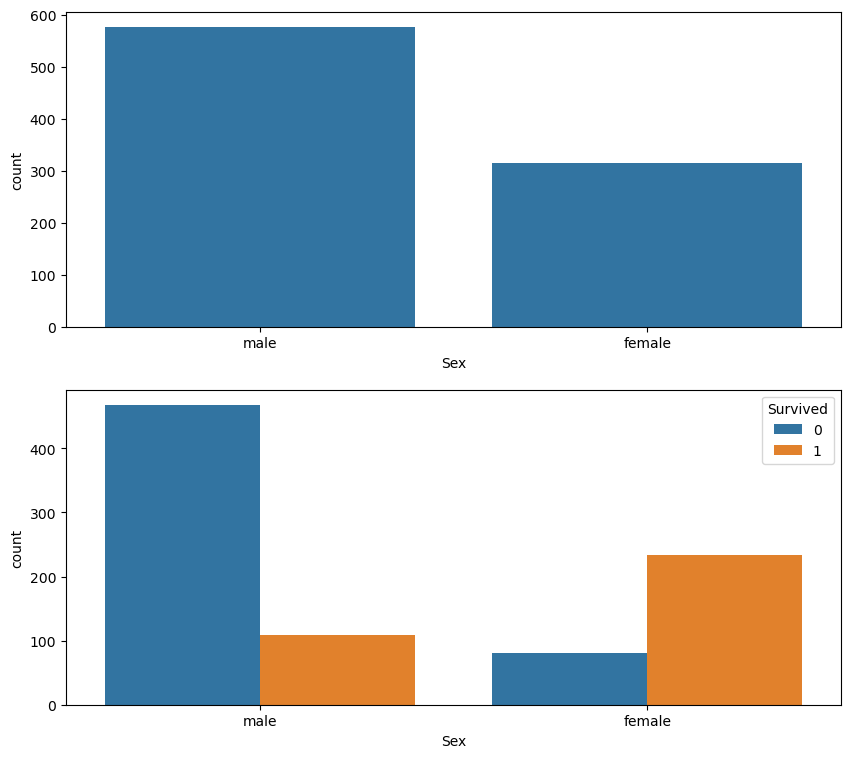

In [8]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize = [10, 9])
plt.subplot(211)
sns.countplot(x = 'Sex', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_df)

<AxesSubplot: xlabel='Age', ylabel='Count'>

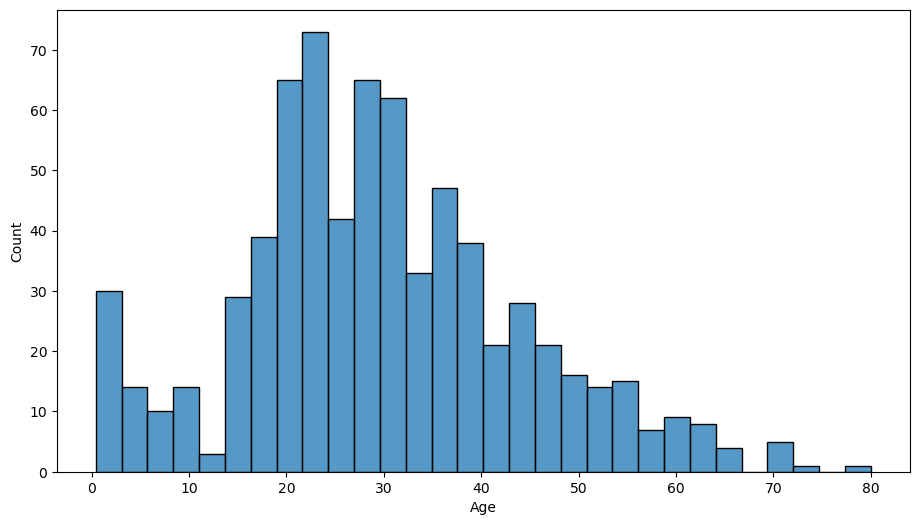

In [9]:
# Age Histogram 
plt.figure(figsize=(11,6))
sns.histplot(data=titanic_df, x='Age', bins=30)

# 4. PERFORM DATA CLEANING AND FEATURE ENGINEERING

<AxesSubplot: >

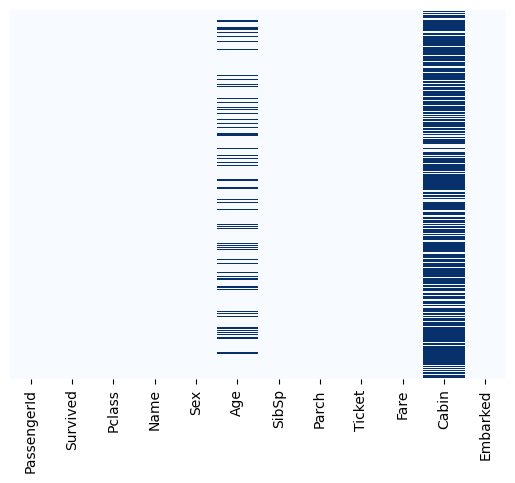

In [10]:
# Let's explore which dataset is missing
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [11]:
# Drop the Embarked, Ticket, PassengerID, Cabin and Name coloumn
titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId', 'Cabin'], axis = 1, inplace = True)

In [12]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


<AxesSubplot: >

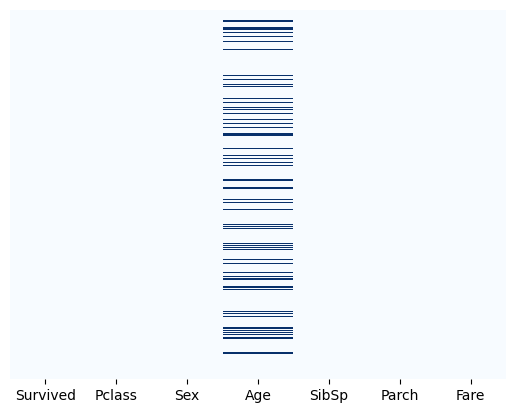

In [13]:
# Let's view the data one more time!
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


<AxesSubplot: xlabel='Sex', ylabel='Age'>

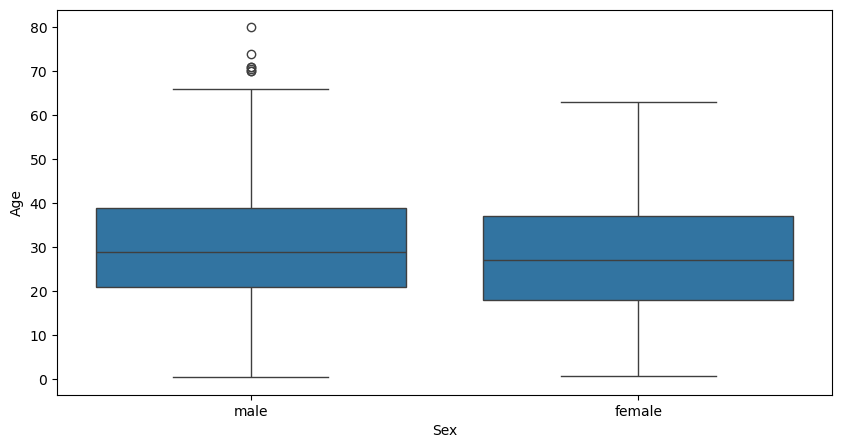

In [14]:
# Get the average age for male and female
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Sex', y = 'Age', data = titanic_df)

In [15]:
# The average age of male is 29 and female is 25
# We will use this information to fill the missing age values
def Fill_Age(data):
    age = data.iloc[0]
    sex = data.iloc[1]

    if pd.isnull(age):
        if sex == 'male': 
            return 29
        else:
            return 25
    else:
        return age
        

In [16]:
titanic_df['Age'] = titanic_df[['Age', 'Sex']].apply(Fill_Age, axis=1)

In [17]:
# Divide the Sex column into two gender columns
pd.get_dummies(titanic_df['Sex'], dtype=int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [18]:
# Get only male column to train model
male = pd.get_dummies(titanic_df['Sex'], dtype=int, drop_first = True)

In [19]:
# Drop the sex coloumn 
titanic_df.drop(['Sex'], axis = 1, inplace = True)

In [20]:
# Now let's add the encoded column male again
titanic_df = pd.concat([titanic_df, male], axis = 1)

In [21]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# 5. TRAIN LOGISTIC REGRESSION CLASSIFIER MODEL

In [22]:
# Drop the target coloumn before we do train test split
X = titanic_df.drop('Survived', axis = 1).values
y = titanic_df['Survived'].values


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [24]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# 6. ASSESS TRAINED MODEL PERFORMANCE

In [25]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

<AxesSubplot: >

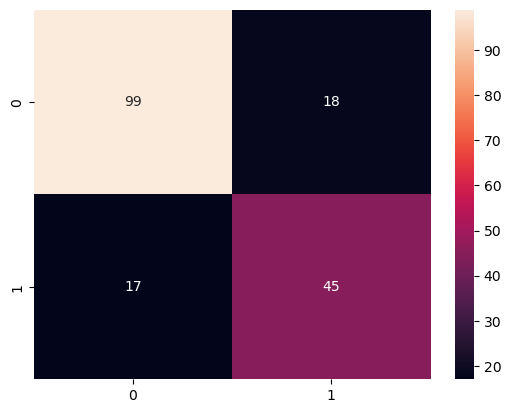

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

- True Negative (TN) = 99 → correctly predicted passengers who did not survive.
- False Positive (FP) = 18 → predicted as survived but actually did not survive.
- False Negative (FN) = 17 → predicted as not survived but actually survived.
- True Positive (TP) = 45 → correctly predicted passengers who survived.

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



# 7. Train a Naive Bayes Classifier Model using Scikit-Learn

In [28]:
# Fitting Naive Bayes Classifier Model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot: >

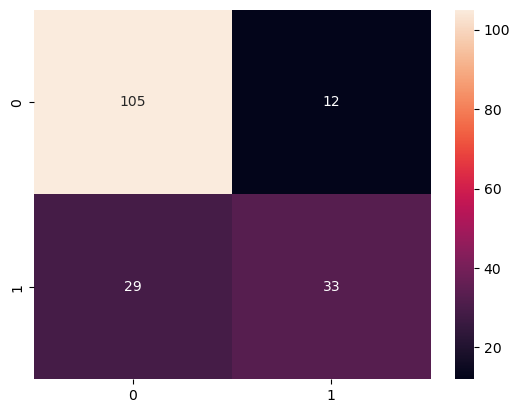

In [29]:
y_predict_test = classifier.predict(X_test)
y_predict_test

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

- True Negative (TN) = 105 → correctly predicted passengers who did not survive.
- False Positive (FP) = 12 → predicted as survived but actually did not survive.
- False Negative (FN) = 29 → predicted as not survived but actually survived.
- True Positive (TP) = 33 → correctly predicted passengers who survived.

In [30]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179



# 8. Compare the two different models

1. Logistic Regression
    - Accuracy: 0.80
    - Class 0 (not survived):
        - Precision = 0.85, Recall = 0.85, F1 = 0.85
    - Class 1 (survived):
        - Precision = 0.71, Recall = 0.73, F1 = 0.72
    - Confusion Matrix:
        - TN = 99, FP = 18, FN = 17, TP = 45
- Balanced performance.
- Good at detecting both survivors and non-survivors.
- Survivors (class 1) still weaker than non-survivors, but decent (F1 = 0.72).

2. Naive Bayes Classifier (your second model)
    - Accuracy: 0.77
    - Class 0 (not survived):
        - Precision = 0.78, Recall = 0.90, F1 = 0.84
    - Class 1 (survived):
        - Precision = 0.73, Recall = 0.53, F1 = 0.62
    - Confusion Matrix:
        - TN = 105, FP = 12, FN = 29, TP = 33
- Very strong at detecting non-survivors (Recall = 0.90).
- Weak at detecting survivors (Recall = 0.53, F1 = 0.62).
- Many survivors are misclassified as not survived (FN = 29).

3. Which model is better?
- Logistic Regression is overall the better model here because it achieves higher accuracy and a much better balance between classes, especially for survivors (which are more important in Titanic predictions).
- Naive Bayes is too biased toward the majority class (non-survivors).